# Logistical Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
import os
import joblib
import json

# Set directory
base_dir = './sets'
# Load validation set and test set
X_val = np.load(f'{base_dir}/X_val.npy')
y_val = np.load(f'{base_dir}/y_val.npy')
X_test = np.load(f'{base_dir}/X_test.npy')
over_sampled_best_X_test = np.load(f'{base_dir}/over_sampled_best_X_test.npy')
under_sampled_best_X_test = np.load(f'{base_dir}/under_sampled_best_X_test.npy')
y_test = np.load(f'{base_dir}/y_test.npy')

# make output directory
output_dir = './logistic_regression_out'
os.makedirs(output_dir, exist_ok=True)


# Hyper Tunning paramaters

In [ ]:
param_grid = { 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
               'penalty': ['l1', 'l2'],
               'solver': ['liblinear', 'saga', 'lbfgs']
            }

# Hyper Tunning to each specific set


## Base Set

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create logistic regression
log_reg = LogisticRegression()

gridSearch = GridSearchCV(log_reg, param_grid,refit=True, verbose=3, scoring="accuracy" ,cv=5,n_jobs=-1,return_train_score=False)

# Base set
X_train = np.load(f'{base_dir}/X_train.npy')
y_train = np.load(f'{base_dir}/y_train.npy')

X_train = np.concatenate((X_train, X_val))
y_train = np.concatenate((y_train, y_val))

y_train = y_train.ravel()

gridSearch.fit(X_train, y_train)

# Get the best model
best_model = gridSearch.best_estimator_

# Get the best hyperparameters
best_hyperparams = gridSearch.best_params_

# Get the best score

best_score = gridSearch.best_score_

print(f'Best hyperparameters: {best_hyperparams}')
print(f'Best score: {best_score}')

# Predict the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')


os.makedirs(output_dir + '/base', exist_ok=True)

output = f'{output_dir}/base/'
# Save the model
joblib.dump(best_model, f'{output}/model.pkl')

# Save the best hyperparameters
with open(f'{output}/best_hyperparams.json', 'w') as f:
    json.dump(best_hyperparams, f)

# Save the accuracy
with open(f'{output}/accuracy.txt', 'w') as f:
    f.write(str(accuracy))

# convert to pandas dataframe
df = pd.DataFrame(gridSearch.cv_results_)

# save to csv
df.to_csv(f'{output}/cv_results.csv', index=False)

## Under Sampling - No Selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create logistic regression
log_reg = LogisticRegression()

gridSearch = GridSearchCV(log_reg, param_grid,refit=True, verbose=3, scoring="accuracy" ,cv=5,n_jobs=-1,return_train_score=False)

# Under sampled set
X_train = np.load(f'{base_dir}/under_sampled_X_train.npy')
y_train = np.load(f'{base_dir}/under_sampled_y_train.npy')

# cant concatenate the validation set because it is not under sampled

y_train = y_train.ravel()

gridSearch.fit(X_train, y_train)

# Get the best model
best_model = gridSearch.best_estimator_

# Get the best hyperparameters
best_hyperparams = gridSearch.best_params_

# Get the best score

best_score = gridSearch.best_score_

print(f'Best hyperparameters: {best_hyperparams}')
print(f'Best score: {best_score}')

# Predict the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')

os.makedirs(output_dir + '/under_sampled_no_selection', exist_ok=True)

output = f'{output_dir}/under_sampled_no_selection/'

# Save the model
joblib.dump(best_model, f'{output}/model.pkl')

# Save the best hyperparameters
with open(f'{output}/best_hyperparams.json', 'w') as f:
    json.dump(best_hyperparams, f)

# Save the accuracy
with open(f'{output}/accuracy.txt', 'w') as f:
    f.write(str(accuracy))

# convert to pandas dataframe
df = pd.DataFrame(gridSearch.cv_results_)

# save to csv
df.to_csv(f'{output}/cv_results.csv', index=False)

## Over Sampling - No Selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create logistic regression
log_reg = LogisticRegression()

gridSearch = GridSearchCV(log_reg, param_grid,refit=True, verbose=3, scoring="accuracy" ,cv=5,n_jobs=-1,return_train_score=False)

# Under sampled set
X_train = np.load(f'{base_dir}/over_sampled_X_train.npy')
y_train = np.load(f'{base_dir}/over_sampled_y_train.npy')

# cant concatenate the validation set because it is not over sampled

y_train = y_train.ravel()

gridSearch.fit(X_train, y_train)

# Get the best model
best_model = gridSearch.best_estimator_

# Get the best hyperparameters
best_hyperparams = gridSearch.best_params_

# Get the best score

best_score = gridSearch.best_score_

print(f'Best hyperparameters: {best_hyperparams}')
print(f'Best score: {best_score}')

# Predict the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')

os.makedirs(output_dir + '/over_sampled_no_selection', exist_ok=True)

output = f'{output_dir}/over_sampled_no_selection/'

# Save the model
joblib.dump(best_model, f'{output}/model.pkl')

# Save the best hyperparameters
with open(f'{output}/best_hyperparams.json', 'w') as f:
    json.dump(best_hyperparams, f)

# Save the accuracy
with open(f'{output}/accuracy.txt', 'w') as f:
    f.write(str(accuracy))

# convert to pandas dataframe
df = pd.DataFrame(gridSearch.cv_results_)

# save to csv
df.to_csv(f'{output}/cv_results.csv', index=False)

## Under Sampling - Selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create logistic regression
log_reg = LogisticRegression()

gridSearch = GridSearchCV(log_reg, param_grid,refit=True, verbose=3, scoring="accuracy" ,cv=5,n_jobs=-1,return_train_score=False)

# Under sampled set
X_train = np.load(f'{base_dir}/under_sampled_best_X_train.npy')
y_train = np.load(f'{base_dir}/under_sampled_y_train.npy')

# cant concatenate the validation set because it is not under sampled

y_train = y_train.ravel()

gridSearch.fit(X_train, y_train)

# Get the best model
best_model = gridSearch.best_estimator_

# Get the best hyperparameters
best_hyperparams = gridSearch.best_params_

# Get the best score

best_score = gridSearch.best_score_

print(f'Best hyperparameters: {best_hyperparams}')
print(f'Best score: {best_score}')

# Predict the test set
y_pred = best_model.predict(under_sampled_best_X_test)

# Calculate the accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')

os.makedirs(output_dir + '/under_sampled_best_selection', exist_ok=True)

output = f'{output_dir}/under_sampled_best_selection/'

# Save the model
joblib.dump(best_model, f'{output}/model.pkl')

# Save the best hyperparameters
with open(f'{output}/best_hyperparams.json', 'w') as f:
    json.dump(best_hyperparams, f)

# Save the accuracy
with open(f'{output}/accuracy.txt', 'w') as f:
    f.write(str(accuracy))

# convert to pandas dataframe
df = pd.DataFrame(gridSearch.cv_results_)

# save to csv
df.to_csv(f'{output}/cv_results.csv', index=False)

## Over Sampling - Selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create logistic regression
log_reg = LogisticRegression()

gridSearch = GridSearchCV(log_reg, param_grid,refit=True, verbose=3, scoring="accuracy" ,cv=5,n_jobs=-1,return_train_score=False)

# Under sampled set
X_train = np.load(f'{base_dir}/over_sampled_best_X_train.npy')
y_train = np.load(f'{base_dir}/over_sampled_y_train.npy')

# cant concatenate the validation set because it is not under sampled

y_train = y_train.ravel()

gridSearch.fit(X_train, y_train)

# Get the best model
best_model = gridSearch.best_estimator_

# Get the best hyperparameters
best_hyperparams = gridSearch.best_params_

# Get the best score

best_score = gridSearch.best_score_

print(f'Best hyperparameters: {best_hyperparams}')
print(f'Best score: {best_score}')

# Predict the test set
y_pred = best_model.predict(over_sampled_best_X_test)

# Calculate the accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')

os.makedirs(output_dir + '/over_sampled_best_selection', exist_ok=True)

output = f'{output_dir}/over_sampled_best_selection/'

# Save the model
joblib.dump(best_model, f'{output}/model.pkl')

# Save the best hyperparameters
with open(f'{output}/best_hyperparams.json', 'w') as f:
    json.dump(best_hyperparams, f)

# Save the accuracy
with open(f'{output}/accuracy.txt', 'w') as f:
    f.write(str(accuracy))

# convert to pandas dataframe
df = pd.DataFrame(gridSearch.cv_results_)

# save to csv
df.to_csv(f'{output}/cv_results.csv', index=False)

# Load and test models

[[TN, FP]
[FN, TP]


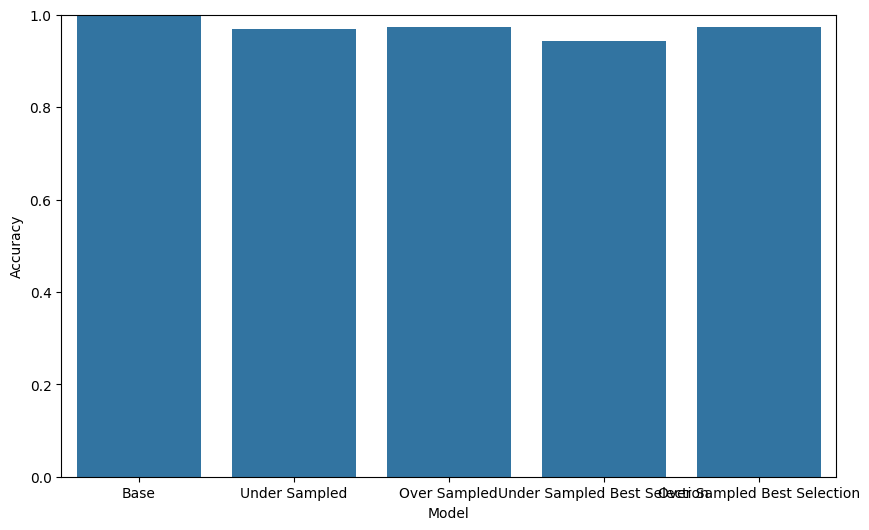

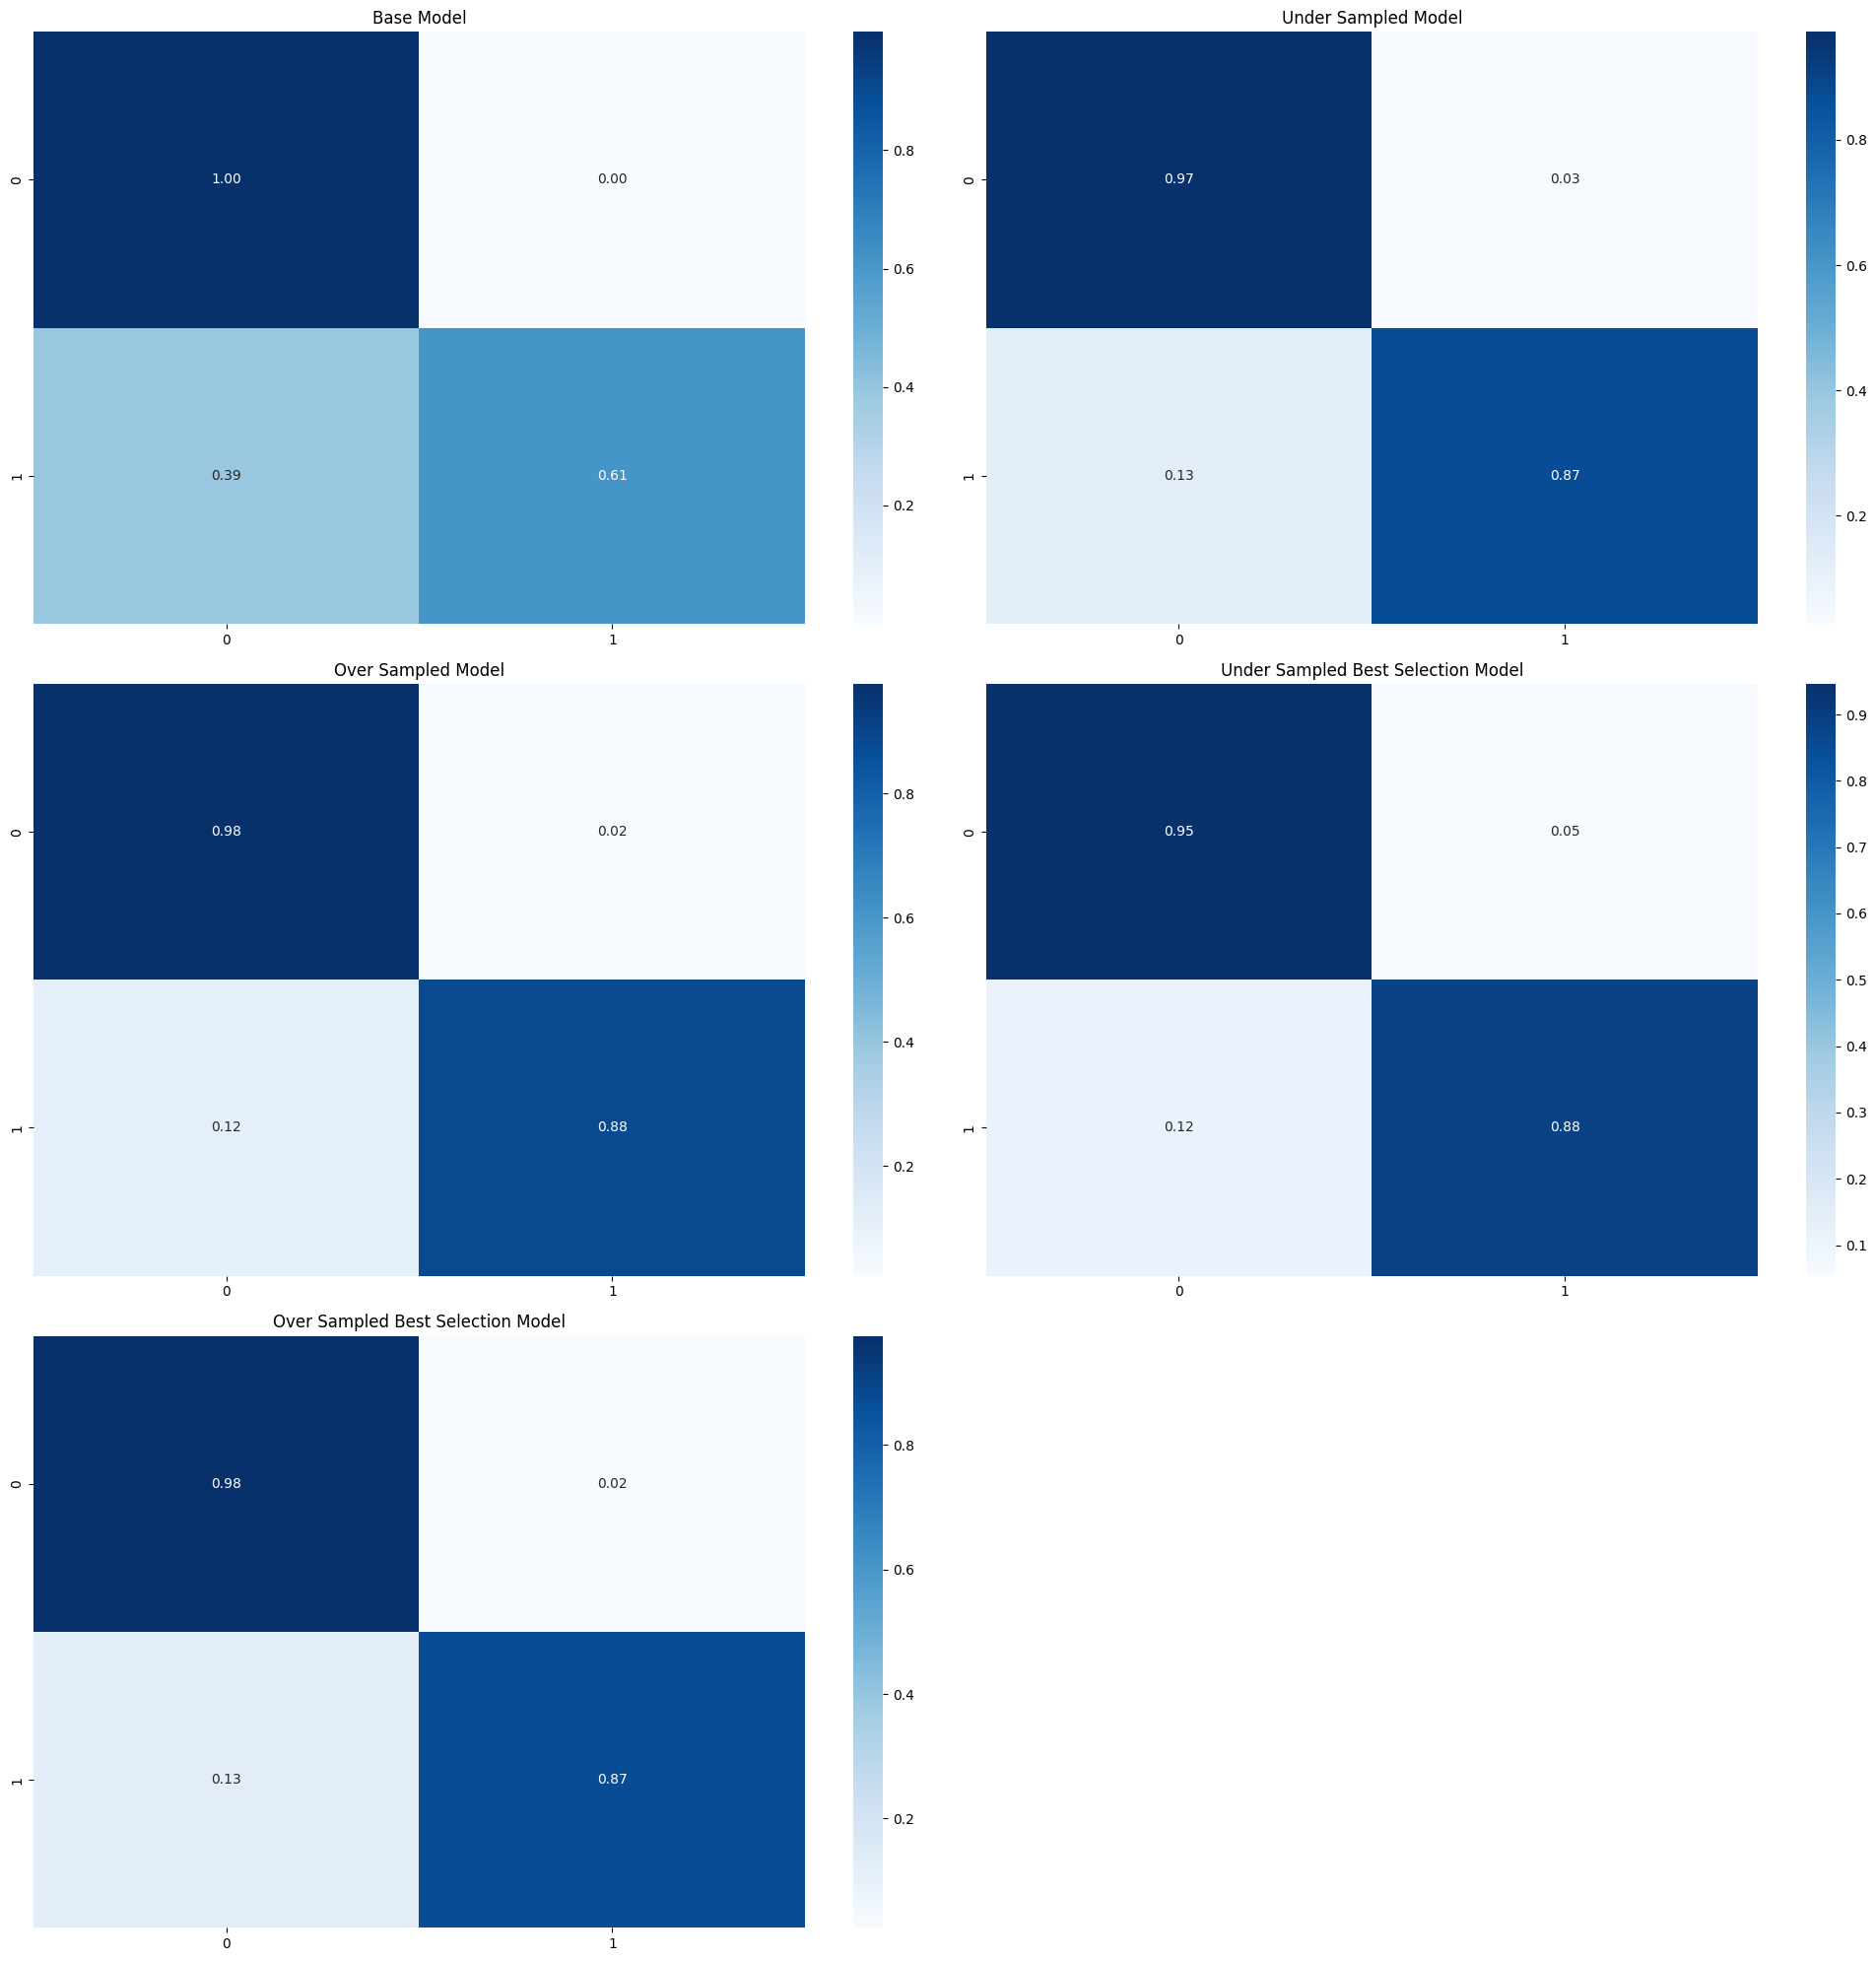

In [3]:
# Load the base model
base_model = joblib.load(f'{output_dir}/base/model.pkl')

# Load the under sampled model
under_sampled_model = joblib.load(f'{output_dir}/under_sampled_no_selection/model.pkl')

# Load the over sampled model
over_sampled_model = joblib.load(f'{output_dir}/over_sampled_no_selection/model.pkl')

# Load the under sampled best selection model
under_sampled_best_model = joblib.load(f'{output_dir}/under_sampled_best_selection/model.pkl')

# Load the over sampled best selection model
over_sampled_best_model = joblib.load(f'{output_dir}/over_sampled_best_selection/model.pkl')

# Predict the test set
base_y_pred = base_model.predict(X_test)
under_sampled_y_pred = under_sampled_model.predict(X_test)
over_sampled_y_pred = over_sampled_model.predict(X_test)
under_sampled_best_y_pred = under_sampled_best_model.predict(under_sampled_best_X_test)
over_sampled_best_y_pred = over_sampled_best_model.predict(over_sampled_best_X_test)

# Calculate the accuracy
base_accuracy = np.mean(base_y_pred == y_test)
under_sampled_accuracy = np.mean(under_sampled_y_pred == y_test)
over_sampled_accuracy = np.mean(over_sampled_y_pred == y_test)
under_sampled_best_accuracy = np.mean(under_sampled_best_y_pred == y_test)
over_sampled_best_accuracy = np.mean(over_sampled_best_y_pred == y_test)

# Create a dataframe
df = pd.DataFrame({
    'Model': ['Base', 'Under Sampled', 'Over Sampled', 'Under Sampled Best Selection', 'Over Sampled Best Selection'],
    'Accuracy': [base_accuracy, under_sampled_accuracy, over_sampled_accuracy, under_sampled_best_accuracy, over_sampled_best_accuracy]
})

# Save the dataframe
df.to_csv(f'{output_dir}/accuracy.csv', index=False)

# Plot the accuracy
plt.figure(figsize=(10, 6))

sns.barplot(x='Model', y='Accuracy', data=df)

plt.ylim(0, 1)

# create a confusion matrix for every model
from sklearn.metrics import confusion_matrix
base_cm = confusion_matrix(y_test, base_y_pred)
under_sampled_cm = confusion_matrix(y_test, under_sampled_y_pred)
over_sampled_cm = confusion_matrix(y_test, over_sampled_y_pred)
under_sampled_best_cm = confusion_matrix(y_test, under_sampled_best_y_pred)
over_sampled_best_cm = confusion_matrix(y_test, over_sampled_best_y_pred)

# normalize the confusion matrix
base_cm = base_cm / base_cm.sum(axis=1)[:, np.newaxis]
under_sampled_cm = under_sampled_cm / under_sampled_cm.sum(axis=1)[:, np.newaxis]
over_sampled_cm = over_sampled_cm / over_sampled_cm.sum(axis=1)[:, np.newaxis]
under_sampled_best_cm = under_sampled_best_cm / under_sampled_best_cm.sum(axis=1)[:, np.newaxis]
over_sampled_best_cm = over_sampled_best_cm / over_sampled_best_cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
print("[[TN, FP]\n[FN, TP]")
plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
sns.heatmap(base_cm, annot=True, fmt='.2f', cmap='Blues')
plt.title('Base Model')

plt.subplot(3, 2, 2)
sns.heatmap(under_sampled_cm, annot=True, fmt='.2f', cmap='Blues')
plt.title('Under Sampled Model')

plt.subplot(3, 2, 3)
sns.heatmap(over_sampled_cm, annot=True, fmt='.2f', cmap='Blues')
plt.title('Over Sampled Model')

plt.subplot(3, 2, 4)
sns.heatmap(under_sampled_best_cm, annot=True, fmt='.2f', cmap='Blues')
plt.title('Under Sampled Best Selection Model')

plt.subplot(3, 2, 5)
sns.heatmap(over_sampled_best_cm, annot=True, fmt='.2f', cmap='Blues')
plt.title('Over Sampled Best Selection Model')

plt.tight_layout()